In [ ]:
from sklearn.model_selection import train_test_split
import warnings
import itertools
from math import sqrt
from datetime import datetime
from numpy import concatenate
import numpy as np
import pandas as pd
import math
from sklearn.utils import shuffle
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM, Bidirectional, GRU
%matplotlib inline
plt.style.use('fivethirtyeight')

Yukarıda ki kod bloğunda gerekli  kütüphanelerin import işlemi gerçekleştirilmiştir.

VERİ OKUMA İŞLEMİ

Daha sonrasında aynı dizinde bulunan GARAN.IS.csv Dosyasını veriseti olarak okuma işlemi yapılmıştır.

In [ ]:
veri = pd.read_csv('GARAN.IS.csv')

Veriyi okuduktan sonra yazdırma işlemi yaparak veriseti kontrol edilmiştir.

In [ ]:
print(veri.describe())

              Open         High          Low        Close    Adj Close  \
count  5658.000000  5658.000000  5658.000000  5658.000000  5658.000000   
mean      5.674597     5.746729     5.596316     5.666694     5.081750   
std       3.524850     3.568545     3.488802     3.525098     3.389226   
min       0.235586     0.235586     0.219614     0.227600     0.179830   
25%       2.224513     2.248053     2.178075     2.210686     1.762003   
50%       6.780000     6.890000     6.690000     6.780000     5.807718   
75%       8.360000     8.450000     8.270000     8.360000     7.599318   
max      16.420000    17.090000    15.400000    16.250000    16.250000   

             Volume  
count  5.658000e+03  
mean   6.080622e+07  
std    6.975801e+07  
min    0.000000e+00  
25%    2.014093e+07  
50%    4.057217e+07  
75%    7.611341e+07  
max    9.936633e+08  


In [ ]:
veri.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-05-10,0.726723,0.726723,0.702765,0.710751,0.561573,17957749.0
1,2000-05-11,0.694779,0.694779,0.662835,0.670821,0.530024,23421861.0
2,2000-05-12,0.718737,0.718737,0.678807,0.686793,0.542644,27451246.0
3,2000-05-15,0.678807,0.678807,0.662835,0.670821,0.530024,5299547.0
4,2000-05-16,0.678807,0.678807,0.662835,0.670821,0.530024,6817297.0
5,2000-05-17,0.678807,0.678807,0.646863,0.654849,0.517404,14765721.0
6,2000-05-18,0.638877,0.638877,0.590961,0.614919,0.485855,32139164.0
7,2000-05-19,NaN,NaN,NaN,NaN,NaN,NaN
8,2000-05-22,0.598947,0.598947,0.574990,0.598947,0.473236,18474658.0
9,2000-05-23,0.598947,0.598947,0.574990,0.598947,0.473236,18474658.0


Veri yazdırma işleminden sonra verilerdeki satır sayısına bakılır. Satır ve sütun bilgileri alındıktan sonra eksik verileri temizleme işlemşne geçilecektir.

In [122]:
veri.count()
veri.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5658.000000,5658.000000,5658.000000,5658.000000,5658.000000,5.658000e+03
mean,5.674597,5.746729,5.596316,5.666694,5.081750,6.080622e+07
std,3.524850,3.568545,3.488802,3.525098,3.389226,6.975801e+07
min,0.235586,0.235586,0.219614,0.227600,0.179830,0.000000e+00
25%,2.224513,2.248053,2.178075,2.210686,1.762003,2.014093e+07
50%,6.780000,6.890000,6.690000,6.780000,5.807718,4.057217e+07
75%,8.360000,8.450000,8.270000,8.360000,7.599318,7.611341e+07
max,16.420000,17.090000,15.400000,16.250000,16.250000,9.936633e+08


In [ ]:
veri.info

<bound method DataFrame.info of             Date       Open       High        Low      Close  Adj Close  \
0     2000-05-10   0.726723   0.726723   0.702765   0.710751   0.561573   
1     2000-05-11   0.694779   0.694779   0.662835   0.670821   0.530024   
2     2000-05-12   0.718737   0.718737   0.678807   0.686793   0.542644   
3     2000-05-15   0.678807   0.678807   0.662835   0.670821   0.530024   
4     2000-05-16   0.678807   0.678807   0.662835   0.670821   0.530024   
...          ...        ...        ...        ...        ...        ...   
5689  2022-05-16  14.980000  14.990000  14.950000  14.970000  14.970000   
5690  2022-05-17  14.880000  14.990000  14.730000  14.970000  14.970000   
5691  2022-05-18  14.950000  16.400000  14.890000  15.650000  15.650000   
5692  2022-05-20  15.550000  17.090000  15.400000  16.250000  16.250000   
5693  2022-05-23  16.420000  16.600000  15.130000  15.170000  15.170000   

           Volume  
0      17957749.0  
1      23421861.0  
2      

In [ ]:
veri.shape

(5694, 7)

EKSİK VERİ KONTROLÜ

Verisetindeki eksik verilerin sayısına bakılıp bu veriler silinerek işlemlere devam edilir.

In [ ]:
print(veri.isnull().sum())

Date          0
Open         36
High         36
Low          36
Close        36
Adj Close    36
Volume       36
dtype: int64


In [ ]:
data=veri.dropna()

Eksik verileri sildikten sonra kontrol işlemi yapılmıştır. Hiç bir sütunda eksik veri yoktur. İşlemlere devam edilir.

In [ ]:
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [123]:
data.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,month,etiket
0,2000-05-10,0.726723,0.726723,0.702765,0.710751,0.561573,17957749.0,May,0
1,2000-05-11,0.694779,0.694779,0.662835,0.670821,0.530024,23421861.0,May,0
2,2000-05-12,0.718737,0.718737,0.678807,0.686793,0.542644,27451246.0,May,0
3,2000-05-15,0.678807,0.678807,0.662835,0.670821,0.530024,5299547.0,May,0
4,2000-05-16,0.678807,0.678807,0.662835,0.670821,0.530024,6817297.0,May,0
5,2000-05-17,0.678807,0.678807,0.646863,0.654849,0.517404,14765721.0,May,0
6,2000-05-18,0.638877,0.638877,0.590961,0.614919,0.485855,32139164.0,May,0
8,2000-05-22,0.598947,0.598947,0.574990,0.598947,0.473236,18474658.0,May,0
9,2000-05-23,0.598947,0.598947,0.574990,0.598947,0.473236,18474658.0,May,0
12,2000-05-26,0.630891,0.630891,0.614919,0.622905,0.492165,4835866.0,May,0


Daha sonra verisetinde ön işleme işlemleri yapılmaya başlanır. Date sütunundaki tarih özelliğimiz gün-ay-yıl şeklinde olduğu için görselleştirme işlemlerinde kullanılacak hale getirilmesi gerekmektedir. Burada month özellik eklenir sütun olarak. Date sütunundaki ay değişkenini alıp buraya month_name olarak aktarılır. Veriseti yazdırma işlemi yapılır.

In [ ]:
data['month'] = pd.DatetimeIndex(data['Date']).month_name()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,month
0,2000-05-10,0.726723,0.726723,0.702765,0.710751,0.561573,17957749.0,May
1,2000-05-11,0.694779,0.694779,0.662835,0.670821,0.530024,23421861.0,May
2,2000-05-12,0.718737,0.718737,0.678807,0.686793,0.542644,27451246.0,May
3,2000-05-15,0.678807,0.678807,0.662835,0.670821,0.530024,5299547.0,May
4,2000-05-16,0.678807,0.678807,0.662835,0.670821,0.530024,6817297.0,May


VERİ GÖRSELLEŞTİRME

plotly kütüphanesi kullanılarak veri görselleştirme işlemi yapılmaktadır. Yukarda oluşturulan month özelliği ile Close özelliğinin birbiri ile ilişkisi gösterilmiştir.

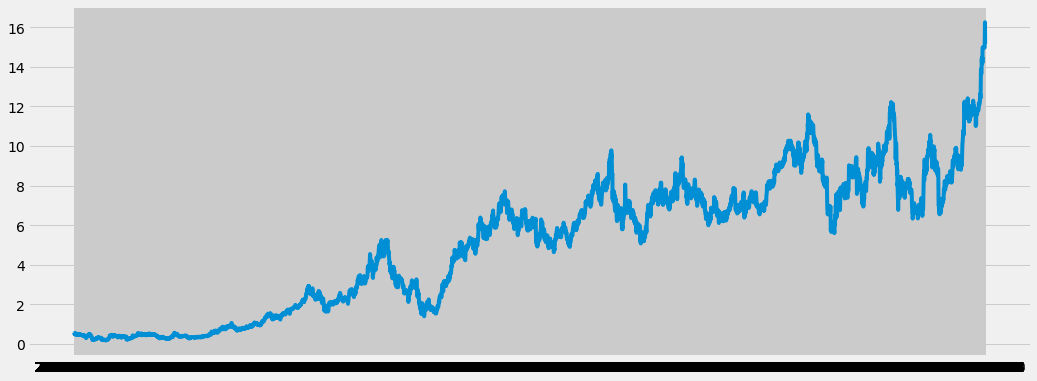

In [130]:
plt.figure(figsize=(16,6))

plt.plot(data.Date,data["Adj Close"]) #biz belirlemediğimiz sürece rengi otomatik kendisi verir. 

plt.show(10)

Seaborn kütüphanesi kullanılarak aylara göre Close özelliğinin değişimi gösterilmiştir.

Text(0, 0.5, 'price')

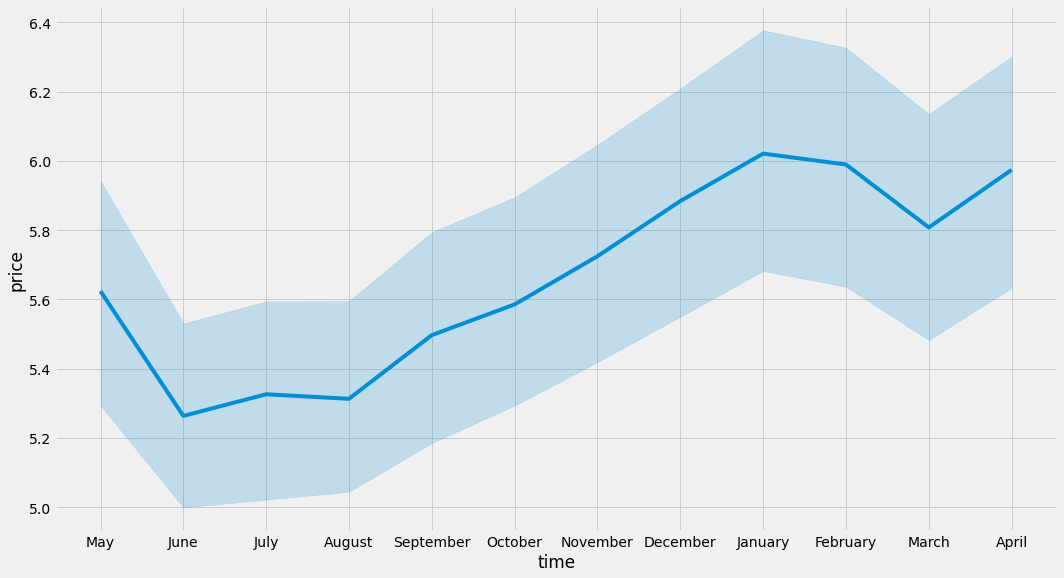

In [131]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=data['Close'], x=data.month)
plt.xlabel('time')
plt.ylabel('price')

Heatmap haritasi için görselleştirme yapılmıştır. Heatmap haritası veriyi büyük resimde görmemizi sağlamaktadır. Açık kısımlar ilişkinin daha çok olduğunu belirtir.

<AxesSubplot:>

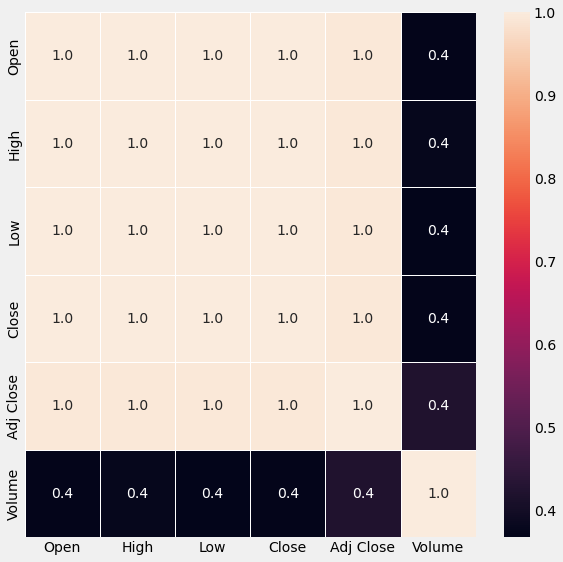

In [ ]:
f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Plotly kütüphanesi kullanılarak sütun grafikleri oluşturulmuştur. İlk grafikte close değişkeni ile işlem yapılmıştır. İkinci grafikte Open değişkeni ile işlem yapılmıştır.

<AxesSubplot:>

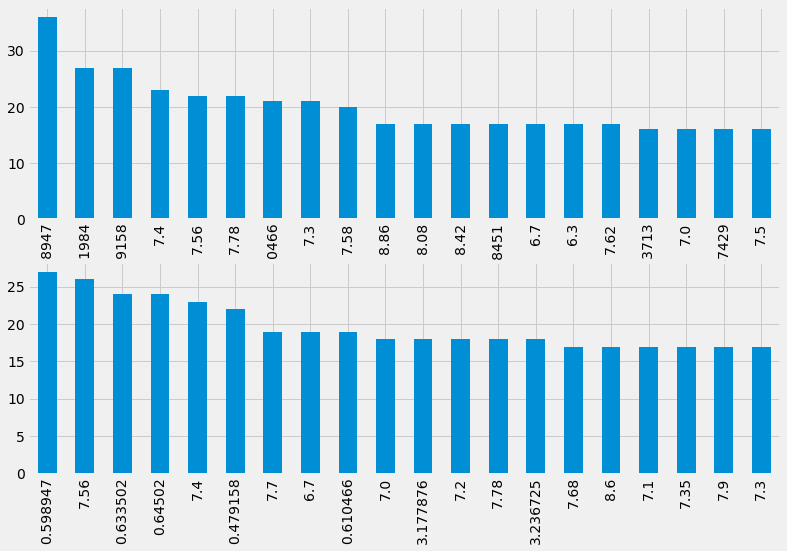

In [ ]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

data['Close'].value_counts().head(20).plot.bar(
    ax=axarr[0]
)

data['Open'].value_counts().head(20).plot.bar(
    ax=axarr[1]
)

Daha sonra boxplot grafiği için month ve Close değişkenleri kullanılmıştır.

<AxesSubplot:xlabel='month', ylabel='Close'>

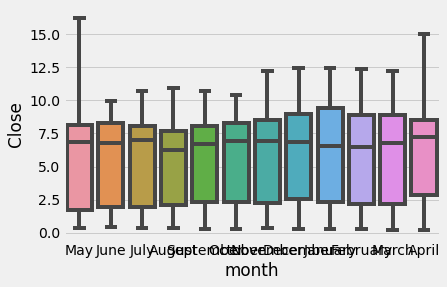

In [133]:
sns.boxplot(x='month', y='Close', data=data)

VERİ ETİKETLEME (LABELİNG) VE ÖZELLİK SEÇİMİ

Etiketleme işlemine geçmek için verisetini df değişkenine kopyalama işlemi yapılır. create_labell fonksiyonu oluşturuldu. Oluşturulan fonksiyonda yeni bir özellik oluşturulur. Değişkende değerler için AL SAT TUT olarak işaretlenir.  Etiket değişkenine eğer AL işaretlenirse 2, Sat ise 1 ve tut diye işaretlenirse 0 diye kaydedilir.

In [ ]:
df=data

In [ ]:
df=pd.DataFrame(df)

In [58]:
def create_labell(df,col_name):
    window_size = 11
    row_counter = 0
    total_rows = len(df)
    labels= np.zeros(total_rows)
    labels=np.array(labels,dtype=int)
    while row_counter < total_rows:
            if row_counter > window_size :
                window_begin = row_counter - window_size
                window_end = window_begin + window_size - 1
                window_middle = (window_begin + window_end) / 2
                min_ = 100
                min_index = -1
                max_ = 0
                max_index = -1
                for i in range(window_begin, window_end + 1):
                    price = df.iloc[i][col_name]
                    if price < min_:
                        min_ = price
                        min_index = i
                    if price > max_:
                        max_ = price
                        max_index = i

                if max_index == window_middle:
                    labels[row_counter] = 1
                elif min_index == window_middle:
                    labels[row_counter] = 2
                else:
                    labels[row_counter] = 0
            else:
                labels[row_counter] = 0
            row_counter = row_counter + 1
    return labels

In [59]:
label = create_labell(df,"Adj Close")


In [60]:
df["etiket"]=np.array(label)
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,month,etiket
0,2000-05-10,0.726723,0.726723,0.702765,0.710751,0.561573,17957749.0,May,0
1,2000-05-11,0.694779,0.694779,0.662835,0.670821,0.530024,23421861.0,May,0
2,2000-05-12,0.718737,0.718737,0.678807,0.686793,0.542644,27451246.0,May,0
3,2000-05-15,0.678807,0.678807,0.662835,0.670821,0.530024,5299547.0,May,0
4,2000-05-16,0.678807,0.678807,0.662835,0.670821,0.530024,6817297.0,May,0
5,2000-05-17,0.678807,0.678807,0.646863,0.654849,0.517404,14765721.0,May,0
6,2000-05-18,0.638877,0.638877,0.590961,0.614919,0.485855,32139164.0,May,0
8,2000-05-22,0.598947,0.598947,0.574990,0.598947,0.473236,18474658.0,May,0
9,2000-05-23,0.598947,0.598947,0.574990,0.598947,0.473236,18474658.0,May,0
12,2000-05-26,0.630891,0.630891,0.614919,0.622905,0.492165,4835866.0,May,0


In [83]:
for i in range(1,len(df)):
    print(label[i])

Burada verisetini eğitim seti ve test seti olarak ikiye ayırmaktadır. Eğitim veri seti yüzde 80 ve test veri seti yüzde 20 olarak ayarlanmıştır.

In [61]:
X = df.drop(["etiket"],axis=1)
y=df["etiket"]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [63]:
len(y_train)

4526

In [64]:
len(y_test)

1132

MODEL OLŞUTURMA

Modelleri kurmak için bazı model kütüphane ve sınıfları import etme işlemleri yapılır. Bir kaç model oluşturuldu ve score dereceleri karşılaştırılır. Enyüksek tahmin alan Model seçilir.

In [65]:
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from xgboost import XGBClassifier

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [94]:
x_train = X_train.drop(["month"],axis=1)
x_train = x_train.drop(["Date"],axis=1)
x_test = X_test.drop(["month"],axis=1)
x_test = x_test.drop(["Date"],axis=1)

In [95]:
pipeline_random = Pipeline([('scale', StandardScaler()), ('clf', RandomForestClassifier())])

#DecisionTree
pipeline_decision = Pipeline([('scale', StandardScaler()), ('clf', DecisionTreeClassifier())])

#K Nearest Neighbors
pipeline_knn = Pipeline([('scale', StandardScaler()), ('clf', KNeighborsClassifier())])

In [96]:
pipelines = [pipeline_random, pipeline_decision, pipeline_knn]

models = ['RandomForest', 'DecisionTree', 'KNN']
model_pipelines = dict(zip(models, pipelines))

In [97]:
for name, pipe in model_pipelines.items():
    print(pipe)
    pipe.fit(x_train, y_train)



Pipeline(steps=[('scale', StandardScaler()), ('clf', RandomForestClassifier())])
Pipeline(steps=[('scale', StandardScaler()), ('clf', DecisionTreeClassifier())])
Pipeline(steps=[('scale', StandardScaler()), ('clf', KNeighborsClassifier())])


In [140]:
models = {}

for name, pipe in model_pipelines.items():
    print('\n'+ name + ' (Avg - F1 Score):')
 
    report = classification_report(y_test, pipe.predict(x_test), target_names=['Sell','Buy', 'Hold'], output_dict=True)
    f1 = report['macro avg']['f1-score']
    
    models[name] = f1

    print(f1)


RandomForest (Avg - F1 Score):
0.31069182389937106

DecisionTree (Avg - F1 Score):
0.35663964787879543

KNN (Avg - F1 Score):
0.31186334430340074


Random Forest, Decision Tree ve KNN algoritmaları denendi. En yüksek tahmin Decision Tree algoritmasıyla yakalandı. Fakat 0.35 derecesi düşük oladuğu için başka algoritmalar da denenmeye devam edeceğiz. XGBClassifier algoritmasından nesne oluşturup veri setimizle fit işlemi yapıyoruz. Fakat bu modelde de isteediğimiz başarı oranı yakalanamadı.

In [113]:
xgboost = XGBClassifier()
xgboost.fit(x_new, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [125]:
report = classification_report(y_test, xgboost.predict(x_test), target_names=['Sell','Buy', 'Hold'], output_dict=True)
f1 = report['macro avg']['f1-score']
print("XGBClassifier SCORE")
print(f1)

XGBClassifier SCORE
0.3099968464206875


In [ ]:
import tensorflow as tf

LSTM modeli kullanılıp veri setimiz eğitilmişitir. Model X_train setine bakarak y_train özelliğini öğrenmektedir. Daha sonra X_test setini modele parametre olarak verdiğimizde y_test özelliğini görmeden tahminlerde bulunmaktadır. Modeli eğittikten sonra predict fonksiyonuna parametre olarak X_train verilir ve ne kadar doğru tahmin yaptığını gösterir.

In [99]:
def windowed_dataset(series, window_size, batch_size, shuffle):

  
    series = tf.expand_dims(series, axis=-1)

    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda w: w.batch(window_size + 1))

    if shuffle:
        dataset = dataset.shuffle(1000)
    dataset = dataset.map(lambda w: (w[:-1], w[-1]))

    return dataset.batch(batch_size).prefetch(1)

In [139]:
WINDOW_SIZE=20
BATCH_SIZE=32

In [101]:
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data  = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = tf.keras.models.Sequential([
            
    tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                           padding="causal",
                           activation="relu",
                           input_shape=[WINDOW_SIZE, 1]),

    # LSTM 
    tf.keras.layers.LSTM(16, activation='tanh'),

    # Dense Layers
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [103]:
loss = tf.keras.losses.Huber()
optm = tf.keras.optimizers.Adam(learning_rate=0.0005)

model.compile(loss=loss, optimizer=optm, metrics=['mse'])

In [137]:

earlystopping = EarlyStopping(monitor='val_loss', patience=10)


checkpoint = tf.keras.callbacks.ModelCheckpoint("my_checkpoint.h5", 
                                               save_best_only=True)

In [105]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=100, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/100
141/141 [==============================] - 3s 10ms/step - loss: 0.1142 - mse: 0.2756 - val_loss: 0.1129 - val_mse: 0.2723
Epoch 2/100
141/141 [==============================] - 1s 7ms/step - loss: 0.1132 - mse: 0.2718 - val_loss: 0.1130 - val_mse: 0.2711
Epoch 3/100
141/141 [==============================] - 1s 8ms/step - loss: 0.1132 - mse: 0.2715 - val_loss: 0.1130 - val_mse: 0.2737
Epoch 4/100
141/141 [==============================] - 1s 8ms/step - loss: 0.1130 - mse: 0.2710 - val_loss: 0.1129 - val_mse: 0.2719
Epoch 5/100
141/141 [==============================] - 1s 8ms/step - loss: 0.1130 - mse: 0.2712 - val_loss: 0.1130 - val_mse: 0.2712
Epoch 6/100
141/141 [==============================] - 1s 7ms/step - loss: 0.1130 - mse: 0.2708 - val_loss: 0.1130 - val_mse: 0.2726
Epoch 7/100
141/141 [==============================] - 3s 19ms/step - loss: 0.1129 - mse: 0.2709 - val_loss: 0.1130 - val_mse: 0.2719
Epoch 8/100
141/141 [==============================] - 1s 7ms/step 

In [ ]:
def fit_model(x_train, y_train ):
    tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                           padding="causal",
                           activation="relu",
                           input_shape=[WINDOW_SIZE, 1]),

    # LSTM Layer
    tf.keras.layers.LSTM(16, activation='tanh'),

    # Dense Layers
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
    
    return(model)
# Fit the first model.
model1 = fit_model(x_train, y_train)